# **Introduction**
In this network we will try to classify handwritten digits (0-9) using deep neural networks (DNNs). We are going to use MNIST dataset for demonstration purposes and we will be using ```sklearn``` library.

Please note that for practical problems, it is advised to use more deep learning specific libraries, e.g., tensorflow (Keras) or PyTorch.

# **Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# **Loading the dataset**

In [ ]:
df_data = pd.read_csv('sample_data/mnist_train_small.csv', header=None)
print(df_data.shape)

(20000, 785)


In [ ]:
df_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df_data.iloc[:, 1:].values
y = df_data.iloc[:,0].values
X = X/255.0
print(X.shape)
print(y.shape)

(20000, 784)
(20000,)


# **Visualize some of input images**

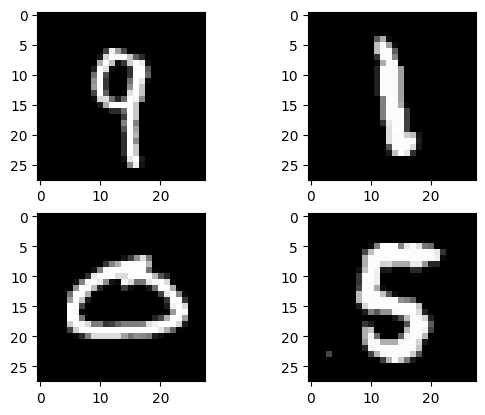

In [ ]:
rand_idx = [48, 2200, 310, 5700] # Picking 4 random samples

#fig, axs = plt.subplots(2,2)
for i in range(4):
  img = X[rand_idx[i], :]
  img = img.reshape(28,28) # reshaping to 28 x 28 images
  digit = plt.subplot(2,2, i+1)
  digit.imshow(img, cmap='gray')
plt.show()

# **Spliting into training and validation**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state=0, test_size=0.3)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(14000, 784)
(14000,)
(6000, 784)
(6000,)


# **Model training and evaluation**

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(verbose=True).fit(X_train,y_train)

Iteration 1, loss = 0.85535691
Iteration 2, loss = 0.34517583
Iteration 3, loss = 0.27805946
Iteration 4, loss = 0.24147736
Iteration 5, loss = 0.21446123
Iteration 6, loss = 0.19383774
Iteration 7, loss = 0.17625399
Iteration 8, loss = 0.16111710
Iteration 9, loss = 0.14628767
Iteration 10, loss = 0.13469414
Iteration 11, loss = 0.12106790
Iteration 12, loss = 0.11352460
Iteration 13, loss = 0.10294421
Iteration 14, loss = 0.09507731
Iteration 15, loss = 0.08735908
Iteration 16, loss = 0.08045207
Iteration 17, loss = 0.07326260
Iteration 18, loss = 0.06997889
Iteration 19, loss = 0.06159627
Iteration 20, loss = 0.05751716
Iteration 21, loss = 0.05347159
Iteration 22, loss = 0.04815273
Iteration 23, loss = 0.04515329
Iteration 24, loss = 0.04127660
Iteration 25, loss = 0.03807365
Iteration 26, loss = 0.03504011
Iteration 27, loss = 0.03218684
Iteration 28, loss = 0.02968545
Iteration 29, loss = 0.02688197
Iteration 30, loss = 0.02574101
Iteration 31, loss = 0.02283744
Iteration 32, los

In [ ]:
y_pred_train = mlp.predict(X_train) # Prediction on training data
y_pred_val = mlp.predict(X_val) # Prediction on validation data

acc_train = (y_pred_train == y_train).sum() / len(y_train)
acc_val = (y_pred_val == y_val).sum() / len(y_val)

print('Accuracy on Training set = {:.2f} %'.format(acc_train * 100))
print('\n')
print('Accuracy on Validation set = {:.2f} %'.format(acc_val * 100))

Accuracy on Training set = 100.00 %


Accuracy on Validation set = 96.08 %


# **Confusion Matrices**

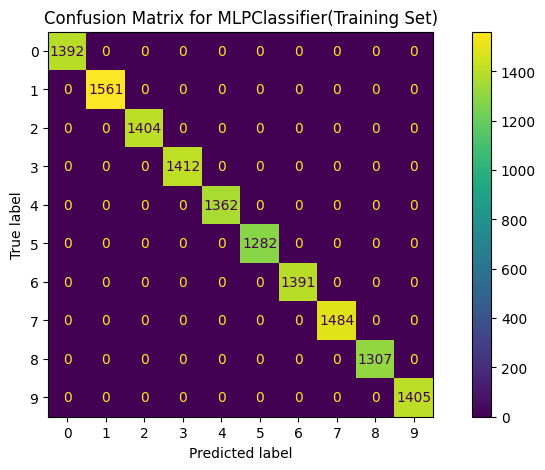

In [ ]:
# Display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

output_classes = np.arange(0,10)
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, ax=ax)
ax.xaxis.set_ticklabels(output_classes)
ax.yaxis.set_ticklabels(output_classes)
_ = ax.set_title(f"Confusion Matrix for Training Set")

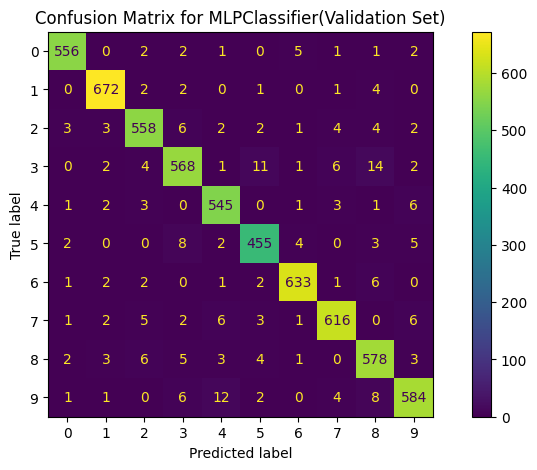

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val, ax=ax)
ax.xaxis.set_ticklabels(output_classes)
ax.yaxis.set_ticklabels(output_classes)
_ = ax.set_title(f"Confusion Matrix for Validation Set")

# **Testing on unseen data**

## **Load test data**

In [ ]:
df_test = pd.read_csv('sample_data/mnist_test.csv')

X_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:,0].values
X_test = X_test/255.0
print(X_test.shape)
print(y_test.shape)

(9999, 784)
(9999,)


## **Prediction**

In [ ]:
y_pred_test = mlp.predict(X_test) # Prediction on test data

acc_test = (y_pred_test == y_test).sum() / len(y_test)

print('Accuracy on Testing set = {:.2f} %'.format(acc_test * 100))

Accuracy on Testing set = 96.09 %


Is it a good result???

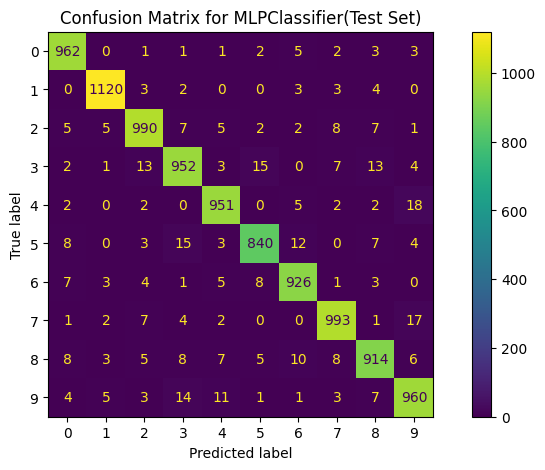

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, ax=ax)
ax.xaxis.set_ticklabels(output_classes)
ax.yaxis.set_ticklabels(output_classes)
_ = ax.set_title(f"Confusion Matrix for Test Set")

## **Visualizing incorrect predictions**

In [ ]:
incorrect = np.where(y_test!=y_pred_test)[0]

#print(incorrect)

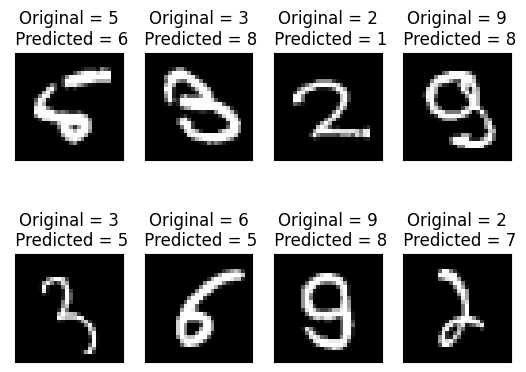

In [ ]:

for i in range(8):
  img = X_test[incorrect[i], :]
  img = img.reshape(28,28) # reshaping to 28 x 28 images
  digit = plt.subplot(2,4, i+1)
  digit.imshow(img, cmap='gray')
  digit.set_xticks(())
  digit.set_yticks(())
  digit.set_title('Original = {}\n Predicted = {}'.format(y_test[incorrect[i]], y_pred_test[incorrect[i]]))
plt.show()